![](LIS_logo.png)

In [98]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import pingouin as pg
#nlp = spacy.load('en_core_web_md')
from sklearn.decomposition import PCA
from collections import Counter
import scipy

custom_style = {
    "axes.facecolor": "#343434",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "figure.facecolor": "#343434",
    "grid.color": "none",  # Remove gridlines
    "text.color": "white",
    "lines.color": "white",  # Default line color
    "lines.markeredgecolor": "white",  # Default marker edge color
    "lines.markerfacecolor": "white",  # Default marker face color
}

sns.set_style("whitegrid", rc=custom_style)


# Apply the custom style
plt.rcParams.update(custom_style)


# Hypothesis testing

## Core claim: If the purpose of counterfactual fabulation is to reduce anxiety by way of evidence hallucination in the service of entropy reduction, then this should be detectable in religious texts. Here, we will test this in relation to the four Gospels of the King James Bible.

### Hypothesis 1: <i>The Gospels should have a more positive valence across encoding categories than English in general.</i>

>If the Good News that we preach is hidden, it is hidden only to those who are lost. The devil who rules this world has blinded the minds of those who do not believe. They cannot see the light of the Good News—the Good News about the glory of Christ, who is exactly like God. (2 Corinthians 4)

### Hypothesis 2: <i>The Gospels should have greater semantic size across encoding categories than English in general.</i>

>Finally, brethren, whatsoever things are true, whatsoever things are honest, whatsoever things are just, whatsoever things are pure, whatsoever things are lovely, whatsoever things are of good report; if there be any virtue, and if there be any praise, think on these things. (Phillipians 4:8)

In [5]:
norms = pd.read_excel("sensorimotor.xlsx", index_col = 0)

## Question: <i>How can we encode a model of the world when the states of the world are computationally intractable</i>?

> It seems probable ... that species possessing some remarkable characteristics, say, of shape, colour, or smell give the observer what might be called a 'right pending disproof' to postulate that these visible characteristics are the sign of equally singular but concealed properties ... This science of the concrete was necessarily restricted by its essence to results other than those destined to be acheived by the exact natural sciences but was no less scientific and its results were no less genuine. They were secured ten thousand years earlier and still remain at the basis of our own civilization. (10-11)

–– Lévi-Strauss, C. (1968). The logic of the concrete. In <i>The savage mind</i> (pp. 1-22). University of Chicago Press. 



## Word norms for two English words

![](radar_plot.png)


In [6]:
norms = norms[['auditory', 'gustatory', 'haptic', 'interoceptive', 'olfactory',
       'visual']]

In [ ]:
sns.displot(norms['interoceptive'].dropna(), color='white', kind = 'kde')
plt.axvline(x=norms['auditory'].median(), color='red', linestyle='--', linewidth=2)
plt.title('Median split on interoception')

<div style="background-color: #343434; color: white; padding: 10px; border-radius: 5px;">
    
## Discretizing of six sensory modalities based on median split
$$
\huge
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\times
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\times
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\times
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\times
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\times
\begin{bmatrix}
1 \\
0
\end{bmatrix} = 2^6 = \text{64 sensory states}
$$

    
</div>

In [8]:
from itertools import product

states = list(product([0, 1], repeat=6))
states = [tuple(state) for state in states]

In [ ]:
states

## 1. Encoding the world through sensory states in all English

In [10]:
english_words = pd.read_pickle('all_english_words.pkl')

In [11]:
states_ = english_words['somatic_state'].value_counts()

In [ ]:

plt.figure(figsize=(14, 6))
ax = sns.pointplot(x=states_.index, y=states_.values, join=False, color='white')
plt.xticks(rotation=90)
plt.title("Counts of 64 somatic states in English")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
names = [i for i in states_.index]
names

In [15]:
ex = [i for i in english_words[english_words['somatic_state'] == 'ex']['word']]

In [ ]:
english_words

In [ ]:
fig = px.scatter_3d(english_words, x='PC1', y='PC2', z='PC3',
              color='somatic_state', hover_data = ['word'])

fig.update_traces(marker=dict(size = 4, line=dict(width=0.01,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))


fig.update_layout(
    title='3D projection of English words into perceptual space by category',
    scene=dict(
        xaxis=dict(backgroundcolor="#343434"),
        yaxis=dict(backgroundcolor="#343434"),
        zaxis=dict(backgroundcolor="#343434"),
    ),
    paper_bgcolor="#343434",
    plot_bgcolor="#343434",
    font=dict(color='white'),
    legend=dict(
        font=dict(size=18, color='white')
    )
)


fig.show()
#fig.write_html("/Users/james/Documents/IGEL/English_PCA.html")


[3D projection of English words into perceptual space by category](https://texturejc.github.io/IGEL/English_PCA.html)

In [ ]:
variable = 'semantic_size'

mean_values = english_words.groupby('somatic_state')[variable].mean()

# Sort categories by the mean value
sorted_categories = mean_values.sort_values().index

plt.figure(figsize=(14, 6))
ax = sns.pointplot(x='somatic_state', y= variable, join=False, order=sorted_categories, data = english_words, color='white')
plt.xticks(rotation=90)
plt.title(variable+" "+"of 64 somatic states in English")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
english_words

In [22]:
english_means = pd.read_pickle('all_means_english.pkl')

In [ ]:
english_means

In [ ]:
fig = px.scatter(english_means, x='valence', y='semantic_size', 
                 size='proportion',  
                 hover_data=['somatic_state'])


fig.update_traces(marker=dict(color='white', line=dict(width=0.01, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))


fig.update_layout(
    title='Somatic categories scaled by frequency in terms of valence and semantic size for all of English',
    paper_bgcolor="#343434",  
    plot_bgcolor="#343434",   
    font=dict(color='white'), 
    xaxis=dict(showgrid=True),  
    yaxis=dict(showgrid=True)   
)

fig.show()

#fig.write_html("/Users/james/Documents/IGEL/English_valence_ss.html")

## 2. The Gospels and English as a whole

In [44]:
gospel_words = pd.read_pickle("all_words_gospel.pkl")

/Users/james/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice



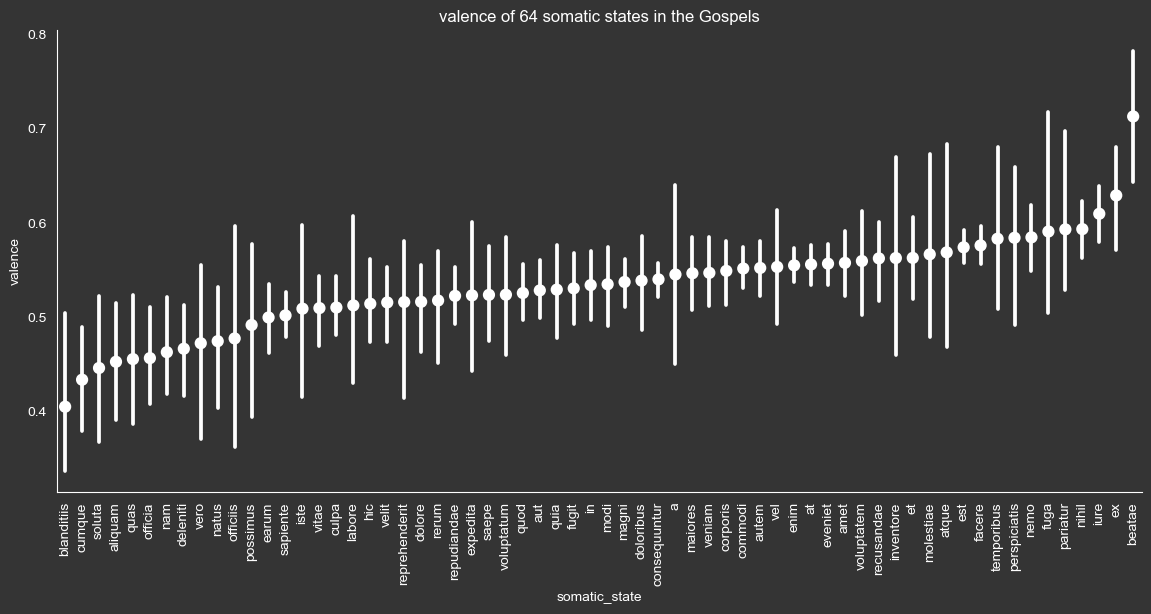

In [113]:
variable = 'valence'

mean_values = gospel_words.groupby('somatic_state')[variable].mean()

# Sort categories by the mean value
sorted_categories = mean_values.sort_values().index

plt.figure(figsize=(14, 6))
ax = sns.pointplot(x='somatic_state', y= variable, join=False, order=sorted_categories, data = gospel_words, color='white')
plt.xticks(rotation=90)
plt.title(variable+" "+"of 64 somatic states in the Gospels")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [48]:
gospel_means = pd.read_pickle("/Users/james/Documents/IGEL/all_data_means_gospel.pkl")

In [50]:
gospel_means = gospel_means[gospel_means['source'] == 'Gospels'].reset_index(drop = True)

In [52]:
all_means = pd.concat([english_means, gospel_means]).reset_index(drop = True)

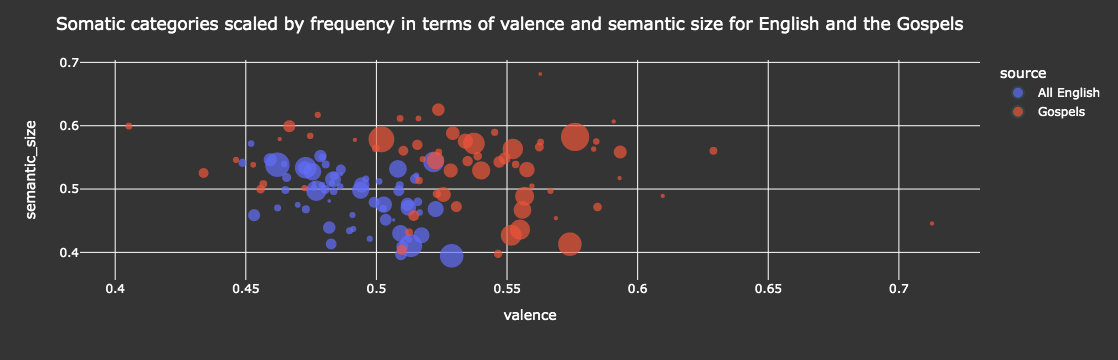

In [111]:
fig = px.scatter(all_means, x='valence', y='semantic_size', 
                 size='proportion',  
                 color='source',     
                 hover_data=['somatic_state'])


fig.update_traces(marker=dict(line=dict(width=0.01, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))


fig.update_layout(
    title='Somatic categories scaled by frequency in terms of valence and semantic size for English and the Gospels',
    paper_bgcolor="#343434",  
    plot_bgcolor="#343434",  
    font=dict(color='white'), 
    xaxis=dict(showgrid=True),  
    yaxis=dict(showgrid=True)   
)


fig.show()

#fig.write_html("/Users/james/Documents/IGEL/English_gospel_valence_ss.html")

[Somatic categories scaled by frequency in terms of valence and semantic size](https://texturejc.github.io/IGEL/English_gospel_valence_ss.html)

In [85]:
all_words = pd.read_pickle("all_words.pkl")

In [88]:
aov = pg.anova(dv='valence', between=['somatic_state','source'], data=all_words,
               detailed=True)

In [112]:
aov

,Source,SS,DF,MS,F,p-unc,np2
0,somatic_state,14.854775,63.0,0.235790,19.833356,5.619711e-215,0.039832
1,source,3.075189,1.0,3.075189,258.667876,5.841962e-58,0.008515
2,somatic_state * source,0.550623,63.0,0.008740,0.735164,9.429997e-01,0.001535
3,Residual,358.083479,30120.0,0.011889,NaN,NaN,NaN


## 3. Measuring entropy differences


In [ ]:
all_words

In [ ]:
all_means

In [95]:
english = all_means.loc[all_means['source'] == "All English", 'proportion']
gospels = all_means.loc[all_means['source'] == "Gospels", 'proportion']

In [102]:
scipy.stats.entropy(english, base = 2) - scipy.stats.entropy(gospels, base = 2)

0.14100854401266982

In [108]:
scipy.stats.entropy(english, gospels, base = 2)

0.08055251840159813

## Next steps: The memetics of religion

### How is the anxiety-reduction payoff from the simpler encoding delivered through <i>work</i>? This can occur through action in two dimensions:

* <b>Evangelism</b>: The low anxiety framing of common somantic states consistent with the Gospels is increased through repetition. Not in the literal sense, but in the alteration of the cultural and physical environment to flood it with evidence of the Gospels' world-encoding. (Small margin, high volume)
* <b>Asceticism</b>: When the information efficiency gains are relatively small due to code similarity, a simpler encoding can make the entropy reduction larger. In this context, this would mean simplifying the sensory encoding of English––say, but removing one sensory modality. In practical terms, this entails asceticism, where sensory states are reduced through active effort (fasting, pilgrimage, mortification, meditation, etc).


In [ ]:
|